# Dodge County COVID-19 Dashboard

This notebook was created to investigate the data provided by Dodge County Health Department and provide a more accurate alternative.


# References

* https://web.archive.org/web/20200101000000*/https://www.co.dodge.wi.gov/government/departments-e-m/human-services-health-department/coronavirus-information
* https://doc.wi.gov/Pages/COVID19(Coronavirus)/COVID19TestingDashboard.aspx
* https://www.dhs.wisconsin.gov/publications/p02677.pdf
* https://www.dhs.wisconsin.gov/covid-19/data-101.htm
* https://www.co.dodge.wi.gov/government/departments-e-m/human-services-health-department/coronavirus-information
* https://globalepidemics.org/key-metrics-for-covid-suppression/?fbclid=IwAR0rmBPprbrmJgIQ8lyr8_mFXQFeSWqESg8O4fAgEjAWuWWYKRmKkXQyqP8
* https://www.co.dodge.wi.gov/home/showdocument?id=38587
* 

In [1]:
# Use the Wisconsin Department of Health Services API to get data

import pandas as pd

q = "https://opendata.arcgis.com/datasets/b913e9591eae4912b33dc5b4e88646c5_10.csv?where=GEO%20%3D%20%27County%27&outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D"
ds = pd.read_csv(q)

In [2]:
county = "Dodge"
county_population = 90005

dc = ds[ds.NAME == county]

In [3]:
dc_summary = dc[["DATE", "NEGATIVE", "POSITIVE", "DEATHS", "DTH_NEW", "HOSP_YES", "POS_NEW", "TEST_NEW" ]].sort_values(["DATE"], ascending=False)

dc_summary["rolling_positive"] = (dc_summary["POSITIVE"]/(dc_summary["POSITIVE"] + dc_summary["NEGATIVE"])) * 100

# TODO: To match the model, this should be a 7 day moving average
dc_summary["new_per_100k"] = (dc_summary["POS_NEW"] / county_population) * 100000

In [4]:
dc_summary.head(7)

,DATE,NEGATIVE,POSITIVE,DEATHS,DTH_NEW,HOSP_YES,POS_NEW,TEST_NEW,rolling_positive,new_per_100k
13435,2020/09/17 14:00:00+00,21174.0,1512,9,0.0,87.0,35.0,236.0,6.664903,38.886729
10673,2020/09/16 14:00:00+00,20973.0,1477,9,1.0,83.0,18.0,222.0,6.579065,19.998889
12967,2020/09/15 14:00:00+00,20769.0,1459,8,0.0,81.0,42.0,43.0,6.563793,46.664074
13367,2020/09/14 14:00:00+00,20768.0,1417,8,0.0,80.0,1.0,107.0,6.387199,1.111049
13038,2020/09/13 14:00:00+00,20662.0,1416,8,0.0,79.0,27.0,275.0,6.413624,29.998333
13275,2020/09/12 14:00:00+00,20414.0,1389,8,0.0,77.0,19.0,159.0,6.370683,21.109938
13194,2020/09/11 14:00:00+00,20274.0,1370,8,1.0,77.0,22.0,81.0,6.329699,24.443086


In [27]:
dc_summary.iloc[0]["POSITIVE"]

1512

<AxesSubplot:xlabel='DATE'>

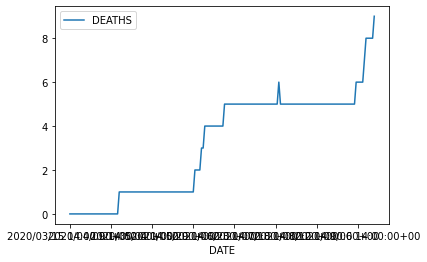

In [61]:
dc_summary.sort_values(["DATE"], ascending=True).plot(x="DATE", y="DEATHS")

<AxesSubplot:xlabel='DATE'>

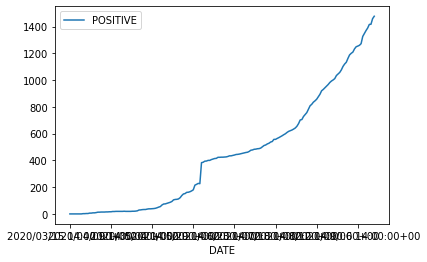

In [62]:
dc_summary.sort_values(["DATE"], ascending=True).plot(x="DATE", y="POSITIVE")

<AxesSubplot:xlabel='DATE'>

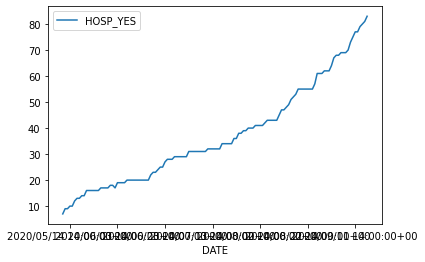

In [63]:
dc_summary.sort_values(["DATE"], ascending=True).plot(x="DATE", y="HOSP_YES")

<AxesSubplot:xlabel='DATE'>

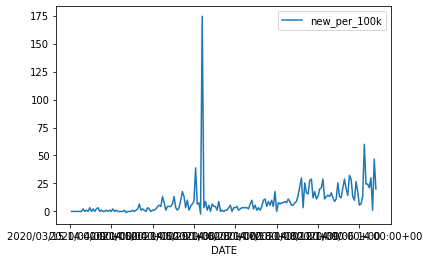

In [64]:
dc_summary.sort_values(["DATE"], ascending=True).plot(x="DATE", y="new_per_100k")